First 5 rows of training data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  

Columns in dataset:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households

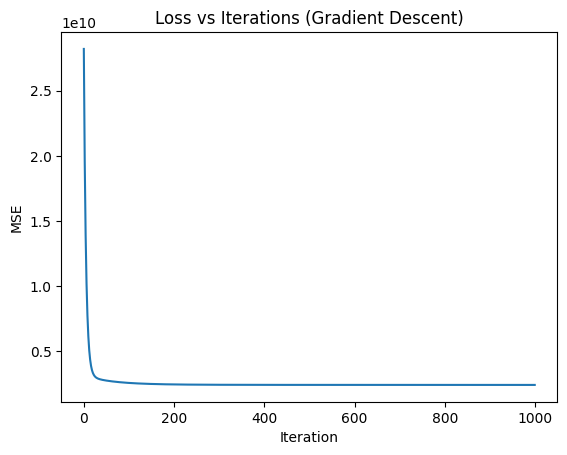

Normal Equation → MSE:4867205486.93, RMSE:69765.36, R2:0.62
Gradient Descent → MSE:4865739423.40, RMSE:69754.85, R2:0.62
Sklearn → MSE:4867205486.93, RMSE:69765.36, R2:0.62


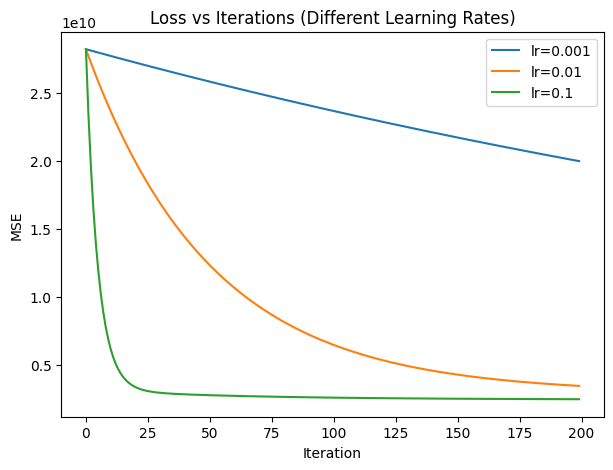

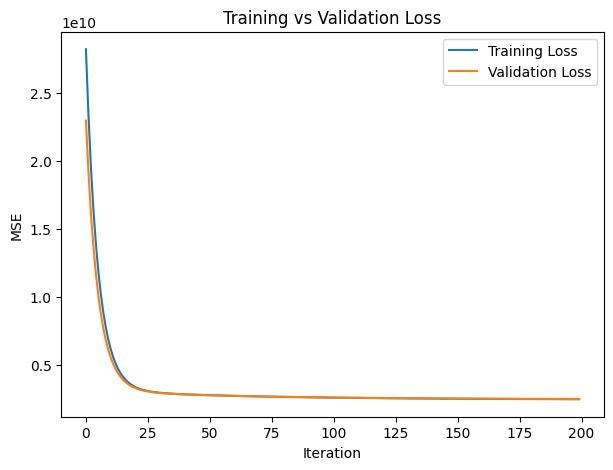

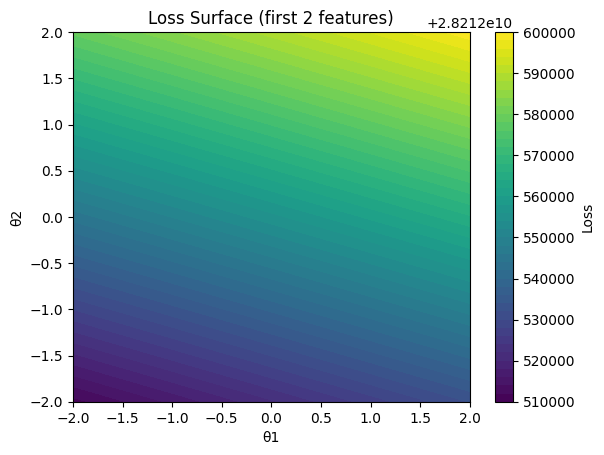

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


train = pd.read_csv("/content/sample_data/california_housing_train.csv")
test = pd.read_csv("/content/sample_data/california_housing_test.csv")

print("First 5 rows of training data:")
print(train.head())
print("\nColumns in dataset:")
print(train.columns)


TARGET = "median_house_value"

X_train_raw = train.drop(columns=[TARGET]).values
y_train = train[TARGET].values


X_test_raw = test.drop(columns=[TARGET]).values
y_test = test[TARGET].values

print("\nShapes before scaling:")
print("X_train_raw:", X_train_raw.shape)
print("y_train:", y_train.shape)
print("X_test_raw:", X_test_raw.shape)
print("y_test:", y_test.shape)

scaler = StandardScaler()


X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

print("\nAfter scaling:")
print("Mean of train features (approx):", X_train.mean(axis=0))
print("Std of train features (approx):", X_train.std(axis=0))


X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

print("\nAfter adding bias column:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)



theta_ne = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
y_pred_ne = X_test @ theta_ne

def gradient_descent(X, y, lr=0.01, iters=1000):
    n, d = X.shape
    theta = np.zeros(d)
    losses = []
    for _ in range(iters):
        error = X @ theta - y
        theta -= (lr/n) * (X.T @ error)
        loss = np.mean(error**2) / 2
        losses.append(loss)
    return theta, losses

theta_gd, losses = gradient_descent(X_train, y_train, lr=0.1, iters=1000)
y_pred_gd = X_test @ theta_gd

plt.plot(losses)
plt.title("Loss vs Iterations (Gradient Descent)")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.show()


model = LinearRegression()
model.fit(X_train[:,1:], y_train)
y_pred_sk = model.predict(X_test[:,1:])


def evaluate(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → MSE:{mse:.2f}, RMSE:{rmse:.2f}, R2:{r2:.2f}")

evaluate("Normal Equation", y_test, y_pred_ne)
evaluate("Gradient Descent", y_test, y_pred_gd)
evaluate("Sklearn", y_test, y_pred_sk)


lrs = [0.001, 0.01, 0.1]
plt.figure(figsize=(7,5))
for lr in lrs:
    _, losses_lr = gradient_descent(X_train, y_train, lr=lr, iters=200)
    plt.plot(losses_lr, label=f"lr={lr}")
plt.title("Loss vs Iterations (Different Learning Rates)")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.legend()
plt.show()


def compute_loss(X, y, theta):
    error = X @ theta - y
    return np.mean(error**2) / 2

theta_tmp, train_losses = gradient_descent(X_train, y_train, lr=0.1, iters=200)
val_losses = []
for i in range(len(train_losses)):

    _, losses_partial = gradient_descent(X_train, y_train, lr=0.1, iters=i+1)
    theta_partial = gradient_descent(X_train, y_train, lr=0.1, iters=i+1)[0]
    val_losses.append(compute_loss(X_test, y_test, theta_partial))

plt.figure(figsize=(7,5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.legend()
plt.show()


X2 = X_train[:, :3]
y2 = y_train

theta0_vals = np.linspace(-2, 2, 50)
theta1_vals = np.linspace(-2, 2, 50)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        theta_tmp = np.array([0, t0, t1])  # [bias, θ1, θ2]
        error = X2 @ theta_tmp - y2
        J_vals[i, j] = np.mean(error**2) / 2

plt.contourf(theta0_vals, theta1_vals, J_vals.T, 50, cmap="viridis")
plt.colorbar(label="Loss")
plt.xlabel("θ1")
plt.ylabel("θ2")
plt.title("Loss Surface (first 2 features)")
plt.show()

